### Partial Differential Equations 3: Exercise sheet 9

The practice questions are similar to the exercises in the textbook and in Schaum's outlines Partial Differential Equations. If you are having difficulties with these questions practice using the remaining questions from these exercise. You will get the best from this tutorial by working though these examples __before__ the tutorial.
\
\
\
__Q1__

a) Find the separated solution of the wave equation,

\begin{align}
\frac{1}{c^2}\frac{\partial^2u}{\partial t^2} = \frac{\partial^2u}{\partial x^2} && (1)
\end{align}

that satisfies the boundary and initial conditions

\begin{align}
u(0,t) &= 0, &t>0, \qquad & (2) \\
u(\pi,t) &= 0, &t>0,\qquad  & (3) \\
u(x,0) &= x^2, & 0\le x\le \pi, \qquad & (4) \\
\frac{\partial u(x,0)}{\partial t} &= 0, & 0\le x\le \pi. \qquad  & (5)
\end{align}

__Solution__

We use the initial and boundary conditions to find the form of the solution from the four basic solution types 

\begin{align}
u_1(x,t) &= \cos\lambda ct\sin\lambda x \\
u_2(x,t) &= \cos\lambda ct\cos\lambda x \\
u_3(x,t) &= \sin\lambda ct\sin\lambda x \\
u_4(x,t) &= \sin\lambda ct\cos\lambda x
\end{align}

For $u(0,t)=0\ \forall t>0$ we require $\sin\lambda x$ in the solution; this removes the two basic solutions $u_2$ and $u_4$. 

Similarly, to fulfil $\frac{\partial}{\partial t}u(x,0)=0,\ 0\le x\le \pi,$ we require that the derivative with respect to $t$ contains $\sin\lambda ct$. Thus removing $u_3$ from the list of possible solutions. 

Therefore the solution needs to have the form $u_1$  

$$
u_1(x,t) = \cos\lambda ct\sin\lambda x
$$

The boundary condition (3) gives a condition for the allowed values of $\lambda$

\begin{align}
0 &= \cos\lambda ct\sin\lambda\pi, \quad \forall t \\
\implies 0 &= \sin\lambda\pi \\
\implies \lambda &= n, \quad \text{ where }n\text{ is any integer >0}
\end{align}

To match the initial condition (4) we form the superposition of these solutions 

$$
u(x,t) = \sum_{n=1}^\infty b_n\cos nct \sin nx
$$

We can do this because the wave equation is linear. We require that

$$
u(x,0) = \sum_{n=1}^\infty b_n\sin nx = x^2, \quad \ 0\le x\le \pi
$$

To determine the $b_n$ we find the Fourier sine series expansion over the finite interval $0\le x\le\pi$ by using integration by parts twice 

\begin{align}
b_n &= \frac2\pi \int_0^{\pi}x^2\sin n x\text{ d}x \\
&= \frac2\pi \left(\left[-\frac{x^2}{n}\cos nx\right]_0^\pi + \int_0^\pi \frac{2x}{n}\cos nx \text{ d}x \right) \\
&= \frac2\pi \left(\left[-\frac{x^2}{n}\cos nx\right]_0^\pi + \left[\frac{2x}{n^2} \sin nx\right]_0^\pi -  \int_0^\pi \frac{2}{n^2}\sin nx \text{ d}x \right) \\
&= \frac2\pi \left(\left[-\frac{x^2}{n}\cos nx\right]_0^\pi + \left[\frac{2x}{n^2} \sin nx\right]_0^\pi + \left[\frac{2}{n^3}\cos nx\right]_0^\pi\right) \\
&= \frac2\pi \left( \frac{-\pi^2}{n}(-1)^n + 0 + \frac{2}{n^3}\left((-1)^n-1\right)\right) \\
&= \frac{2\pi}{n}(-1)^{n+1} + \frac{4}{\pi n^3}\left((-1)^n-1\right)
\end{align}

So the solution is 

$$
u(x,t) = \sum_{n=1}^\infty \left(\frac{2\pi}{n}(-1)^{n+1} + \frac{4}{\pi n^3}\left((-1)^n-1\right)\right) \cos nct \sin nx
$$
\
\
\
b) Use Python to plot the solution.

Using a suitable range for $t$,

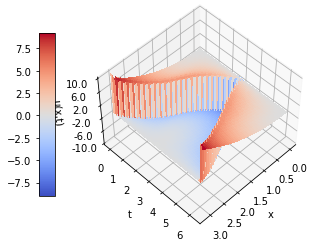

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator , FormatStrFormatter
import numpy as np
# Solution to the 1-d wave equation
# Set the x and t grid points and the meshgrid
N = 200
a = 2*np.pi
c = 1
x = np.linspace(0,np.pi,N)
t = np.linspace(0,a,N)
X,T = np.meshgrid(x,t)
# Define the function and generate the output on the meshgrid
Z = X*0
M = 200
for i in range(1,M):
    p = ((2*np.pi*((-1)**(i+1))/i)+(4*(((-1)**i)-1)/np.pi/i**3))
    Z = Z + p*np.cos(i*c*T)*np.sin(i*X)
# Generate the plot
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the surface
surf = ax.plot_surface(X,T,Z,cmap=cm.coolwarm,linewidth=0,antialiased=False)
# Customize the z axis
ax.set_zlim(-10,10)
ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(50,45)
# Add a color bar which maps values to colors
fig.colorbar(surf,shrink=0.75,aspect=10,location='left')
plt.show()

__Q2__

Problem from Schaum's Chapter 8, p. 224

a) An infinitely long string having one end at $x=0$ is initially at rest on the $x$ axis. The end $x=0$ undergoes a periodic transverse displacement given by $A_0 \sin(\omega t)$ for $t>0$. Find the displacement of any point on the string at any time.
\
\
\
__Solution__

If $u(x,t)$ is the transverse displacement of a string at any point $x$ at any time $t$, then the boundary value problem is 

$$
\frac{\partial^2 u}{\partial t^2}=c^2\frac{\partial^2 u}{\partial x^2}
$$

with the initial and boundary conditions

\begin{align}
u(x,0) &= 0, &\forall x, \qquad & (a) \\
\frac{\partial}{\partial t}u(x,0) &= 0, & \forall x \qquad  & (b) \\
u(0,t) &= A_0 \sin(\omega t), & t>0, \qquad & (c) \\
|u(x,t)| &< M, &\exists M>0, \forall x, \forall t. \qquad & (d)
\end{align}

The initial conditions (a) and (b) ensure that the string is initially at rest. The boundary condition (c) describes a periodic displacement at $x=0$ while boundary condition (d) specifies that the displacement is bounded.

Taking the Laplace transform with respect to $t$ of the differential equation and the boundary conditions gives

\begin{align}
s^2 U(x,s) - s u(x,0) - u'(x,0) &= c^2 \frac{\partial^2 U(x,s)}{\partial x^2} & (e) \\
U(0,s) &= \frac{A_0\omega}{s^2+\omega^2} & (f) \\
U(x,s) &< K, \quad \exists K, \forall x, \forall s. & (g)
\end{align}

where the last condition shows that the Laplace transform of the displacement is also bounded.

Inserting the initial conditions (a) and (b) we get an ordinary differential equation for $U(x,s)$

$$
\frac{\partial^2 U}{\partial x^2} - \frac{s^2}{c^2}U = 0
$$

The general solution of this differential equation is

$$
U(x,s) = a_1 e^{sx/c} + a_2 e^{-sx/c}
$$

This can be found from the characteristic polynomial and the ODE solution methods.

From condition (g) on the boundedness of the Laplace transform we can infer that $a_1=0$. This is the case because the exponential term $e^{sx/c}$ is unbounded. 

The coefficient $a_2$ can be found by using the condition (f) at $x=0$

$$
U(0,s) = a_2 e^{0} \overset{!}{=} \frac{A_0\omega}{s^2+\omega^2} 
$$

and thus

$$
a_2 = \frac{A_0\omega}{s^2+\omega^2} 
$$

and the solution in the Laplace domain is 

$$
U(x,s) = \frac{A_0\omega}{s^2+\omega^2} e^{-sx/c}
$$

We can invert this by using the time shift property and the Laplace transform of the sine to get

$$
u(x,t) = A_0 \sin\left[\omega (t-x/c)\right] H(t-x/c)
$$

Physically, this means that a point $x$ of the string stays at rest until the time $t=x/c$. Thereafter it undergoes motion identical with that of the end $x=0$ but lags behind it in time by the amount $x/c$. The constant $c$ is the speed with which the wave travels.
\
\
\
b) Use Python to plot the solution.

Using a suitable range for $x$ and $t$,


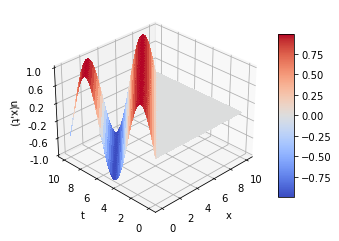

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator , FormatStrFormatter
import numpy as np
# Solution to the 1-d wave equation
# Set the x and t grid points and the meshgrid
N = 100
x = np.linspace(0,10,N)
t = np.linspace(0,10,N)
X,T = np.meshgrid(x,t)
c = 1
A0 = 1
omega = 1
# Define the function and generate the output on the meshgrid
W = T - X/c
Z = A0*np.sin(omega*W)*np.heaviside(W,0.5)
# Generate the plot
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the surface
surf = ax.plot_surface(X,T,Z,cmap=cm.coolwarm,linewidth=0,antialiased=False)
# Customize the z axis
ax.set_zlim(-1,1)
ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(30,-135)
# Add a color bar which maps values to colors
fig.colorbar(surf,shrink=0.75,aspect=10)
plt.show()